<br> Notebook to prepare data for clear sky detection
<br> Clear sky period are determined from the clear sky flag from NOAA RadFlux https://gml.noaa.gov/aftp/data/radiation/surfrad/RadFlux/, quality flag from https://solarforecastarbiter.org/ and comparison with clear-sky GHI value from PVLIB

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

plt.rcParams["font.family"] = "Times New Roman"

In [2]:
df_raw = pd.read_csv('2020_clear_sky_detection_dra.csv')
df_raw['time'] = pd.to_datetime(df_raw['time'])
df_raw = df_raw.set_index(df_raw['time'])
df_raw.head()

,time,ghi,quality_flag,ghi_csm,cosz,swdn,cswdn,clrf
time,,,,,,,,
2020-01-01 08:00:00,2020-01-01 08:00:00,0.0,18.0,0.0,-0.970861,0.0,0.0,2
2020-01-01 08:01:00,2020-01-01 08:01:00,0.0,3090.0,0.0,-0.970676,0.0,0.0,2
2020-01-01 08:02:00,2020-01-01 08:02:00,0.0,18.0,0.0,-0.970476,0.0,0.0,2
2020-01-01 08:03:00,2020-01-01 08:03:00,0.0,18.0,0.0,-0.970262,0.0,0.0,2
2020-01-01 08:04:00,2020-01-01 08:04:00,0.0,3090.0,0.0,-0.970034,0.0,0.0,0


In [3]:
dates = pd.date_range(start = '2020-01-01', end = '2020-12-31', freq = '1d')
dates

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10',
               ...
               '2020-12-22', '2020-12-23', '2020-12-24', '2020-12-25',
               '2020-12-26', '2020-12-27', '2020-12-28', '2020-12-29',
               '2020-12-30', '2020-12-31'],
              dtype='datetime64[ns]', length=366, freq='D')

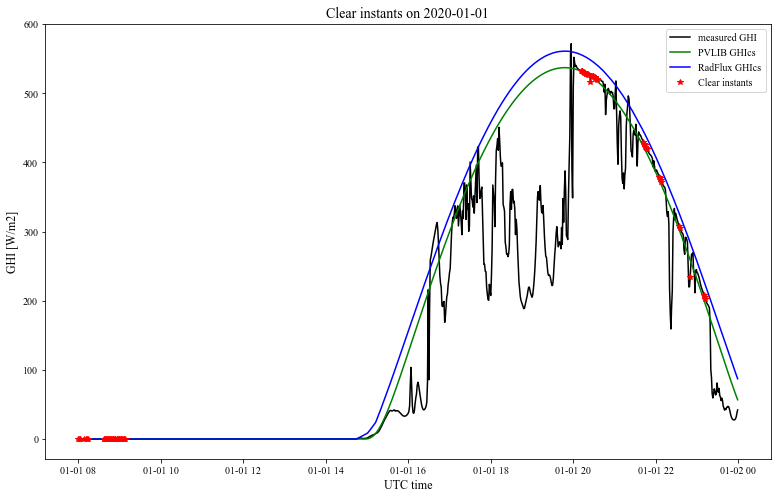

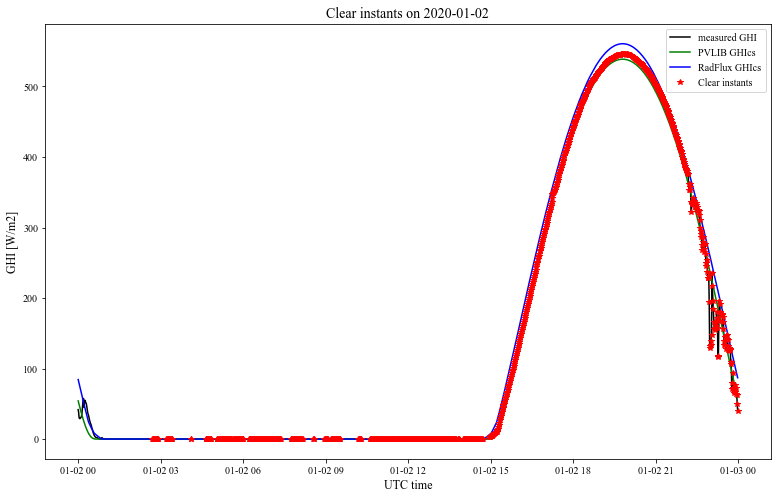

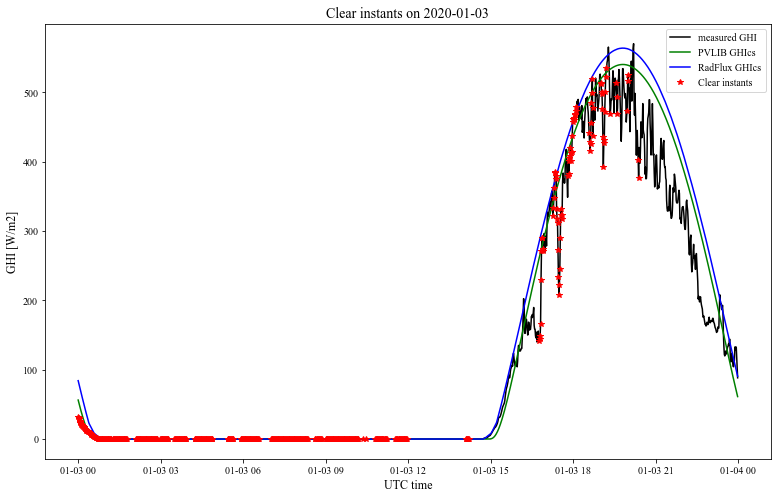

In [4]:
# example to show the detected clear-sky instants 
for date in dates[:3]:
    
    dt = date
    dt_ = dt + datetime.timedelta(minutes = 1439)
    times = pd.date_range(start = dt, end = dt_, freq = '1min')
    
    times_ = [time for time in times if time in df_raw.index]
    
    clrf = []
    df_ = df_raw.loc[times_]
    for index in df_.index:
        if df_.loc[index,'clrf'] == 1 or df_.loc[index,'clrf'] == 2:
            clrf.append(index)
            
    plt.figure(figsize = (13,8))
    plt.plot(times_, df_raw.loc[times_,'ghi'], label = 'measured GHI',color = 'black')
    plt.plot(times_, df_raw.loc[times_,'ghi_csm'], label = 'PVLIB GHIcs',color = 'green')
    plt.plot(times_, df_raw.loc[times_,'cswdn'], label = 'RadFlux GHIcs', color = 'blue')
    plt.plot(clrf,np.ravel(df_.loc[clrf,'ghi'].values),'r*',label = 'Clear instants')
    plt.title('Clear instants on '+ str(date)[:10], fontsize = 14)
    plt.xlabel('UTC time', fontsize = 12)
    plt.ylabel('GHI [W/m2]', fontsize = 12)
    plt.legend()
    plt.show()

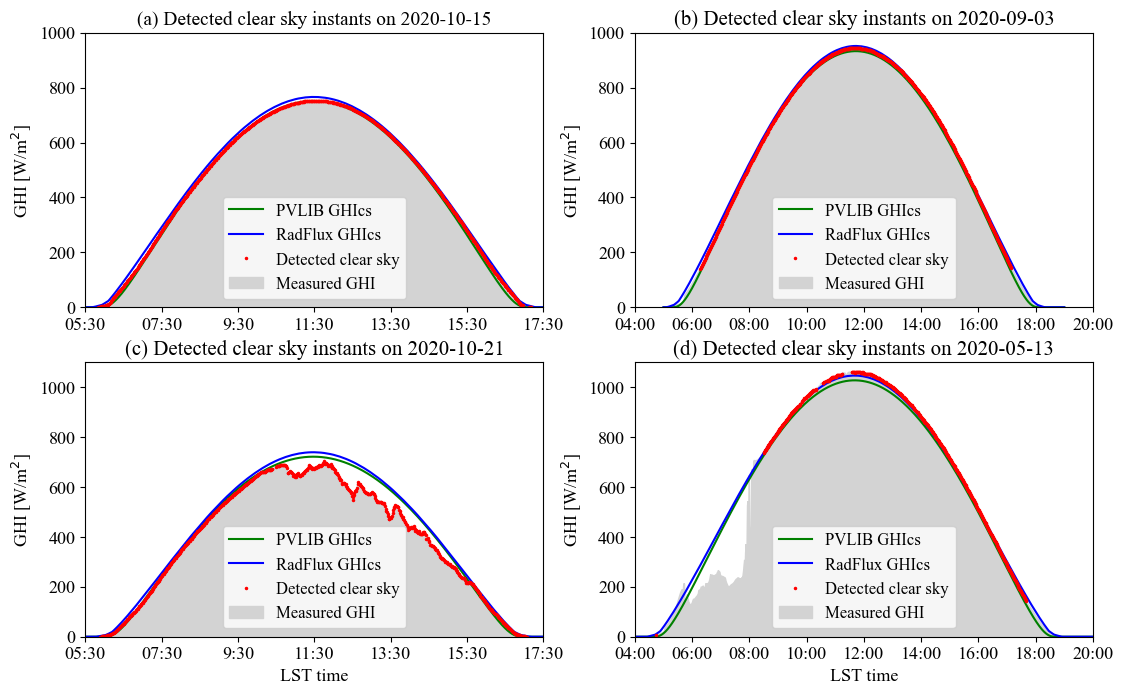

In [5]:
# to show some results of the detected clear-sky days

plt.figure(figsize=(13,8),dpi=100)

plt.subplot(221)
times1 = pd.date_range(start = '2020-10-15 13:30:00',end = '2020-10-16 01:30:00', freq = '1min')
df_1 = df_raw.loc[times1]
clrf1 = [] # clear sky flags
for index in df_1.index:
    if (df_1.loc[index,'clrf'] == 1 or df_1.loc[index,'clrf'] == 2) and df_1.loc[index,'ghi'] > 0:
        clrf1.append(index)

plt.fill(times1,df_raw.loc[times1,'ghi'],color='lightgray',label='Measured GHI')
plt.plot(times1, df_raw.loc[times1,'ghi_csm'], label = 'PVLIB GHIcs',color = 'green')
plt.plot(times1, df_raw.loc[times1,'cswdn'], label = 'RadFlux GHIcs', color = 'blue')
plt.plot(clrf1,np.ravel(df_1.loc[clrf1,'ghi'].values),'r.',markersize = 3,label = 'Detected clear sky')
plt.title('(a) Detected clear sky instants on 2020-10-15', fontsize = 14)

plt.ylabel('GHI [W/m$^2$]', fontsize = 13)
plt.ylim(0,1000)
x_index = pd.date_range(start = '2020-10-15 13:30:00',end = '2020-10-16 01:30:00', freq = '2h')
plt.xlim(x_index[0],x_index[-1])
plt.xticks(pd.date_range(start = '2020-10-15 13:30:00',end = '2020-10-16 01:30:00', freq = '2h'),
           ['05:30','07:30','9:30','11:30','13:30','15:30','17:30'], fontsize = 13)
plt.yticks(fontsize = 13)
plt.legend(fontsize = 12)

plt.subplot(222)
times2 = pd.date_range(start = '2020-9-3 13:00:00',end = '2020-9-4 03:00:00', freq = '1min')
df_2 = df_raw.loc[times2]
clrf2 = [] # clear sky flags
for index in df_2.index:
    if (df_2.loc[index,'clrf'] == 1 or df_2.loc[index,'clrf'] == 2) and df_2.loc[index,'ghi'] > 0:
        clrf2.append(index)

plt.fill(times2,df_raw.loc[times2,'ghi'],color='lightgray',label='Measured GHI')
plt.plot(times2, df_raw.loc[times2,'ghi_csm'], label = 'PVLIB GHIcs',color = 'green')
plt.plot(times2, df_raw.loc[times2,'cswdn'], label = 'RadFlux GHIcs', color = 'blue')
plt.plot(clrf2,np.ravel(df_2.loc[clrf2,'ghi'].values),'r.',markersize = 3,label = 'Detected clear sky')
plt.title('(b) Detected clear sky instants on 2020-09-03', fontsize = 15)
plt.ylim(0,1000)
plt.ylabel('GHI [W/m$^2$]', fontsize = 13)
plt.xticks(pd.date_range(start = '2020-9-3 12:00:00',end = '2020-9-4 04:00:00', freq = '2h'),
           ['04:00','06:00','08:00','10:00','12:00','14:00','16:00','18:00','20:00'], fontsize = 13)
plt.yticks(fontsize = 13)
plt.legend(fontsize = 12) 

plt.subplot(223)
times2 = pd.date_range(start = '2020-10-21 13:30:00',end = '2020-10-22 01:30:00', freq = '1min')
times2 = [time for time in times2 if time in df_raw.index]
df_2 = df_raw.loc[times2]
clrf2 = [] # clear sky flags
for index in df_2.index:
    if (df_2.loc[index,'clrf'] == 1 or df_2.loc[index,'clrf'] == 2) and df_2.loc[index,'ghi'] > 0:
        clrf2.append(index)

plt.fill(times2,df_raw.loc[times2,'ghi'],color='lightgray',label='Measured GHI')
plt.plot(times2, df_raw.loc[times2,'ghi_csm'], label = 'PVLIB GHIcs',color = 'green')
plt.plot(times2, df_raw.loc[times2,'cswdn'], label = 'RadFlux GHIcs', color = 'blue')
plt.plot(clrf2,np.ravel(df_2.loc[clrf2,'ghi'].values),'r.',markersize = 3,label = 'Detected clear sky')
plt.title('(c) Detected clear sky instants on 2020-10-21', fontsize = 15)
plt.xlabel('LST time', fontsize = 13)
plt.ylim(0,1100)
x_index = pd.date_range(start = '2020-10-21 13:30:00',end = '2020-10-22 01:30:00', freq = '2h')
plt.xlim(x_index[0],x_index[-1])
plt.ylabel('GHI [W/m$^2$]', fontsize = 13)
plt.xticks(pd.date_range(start = '2020-10-21 13:30:00',end = '2020-10-22 01:30:00', freq = '2h'),
            ['05:30','07:30','9:30','11:30','13:30','15:30','17:30'], fontsize = 13)
plt.yticks(fontsize = 13)
plt.legend(fontsize = 12)

plt.subplot(224)
times2 = pd.date_range(start = '2020-5-13 12:00:00',end = '2020-5-14 04:00:00', freq = '1min')
df_2 = df_raw.loc[times2]
clrf2 = []
for index in df_2.index:
    if (df_2.loc[index,'clrf'] == 1 or df_2.loc[index,'clrf'] == 2) and df_2.loc[index,'ghi'] > 0:
        clrf2.append(index)
#plt.plot(times2, df_raw.loc[times2,'ghi'], label = 'Measured GHI',color = 'black')
plt.fill(times2,df_raw.loc[times2,'ghi'],color='lightgray',label='Measured GHI')
plt.plot(times2, df_raw.loc[times2,'ghi_csm'], label = 'PVLIB GHIcs',color = 'green')
plt.plot(times2, df_raw.loc[times2,'cswdn'], label = 'RadFlux GHIcs', color = 'blue')
plt.plot(clrf2,np.ravel(df_2.loc[clrf2,'ghi'].values),'r.',markersize = 3, label = 'Detected clear sky')
plt.title('(d) Detected clear sky instants on 2020-05-13', fontsize = 15)
plt.xlabel('LST time', fontsize = 13)
plt.ylim(0,1100)
x_index = pd.date_range(start = '2020-5-13 12:00:00',end = '2020-5-14 04:00:00', freq = '2h')
plt.xlim(x_index[0],x_index[-1])
plt.ylabel('GHI [W/m$^2$]', fontsize = 13)
plt.xticks(pd.date_range(start = '2020-5-13 12:00:00',end = '2020-5-14 04:00:00', freq = '2h'),
           ['04:00','06:00','08:00','10:00','12:00','14:00','16:00','18:00','20:00'], fontsize = 13)
plt.yticks(fontsize = 13)
plt.legend(fontsize = 12)

#plt.savefig('fig2.pdf',bbox_inches='tight')
plt.show()